In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/Users/habeeb/Downloads/Git/ML/Powerbox/ETL/Raw_data/Data_v1.csv')

# Convert timestamp to datetime and sort
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce', dayfirst=True)
data = data.sort_values('Timestamp')

#print the head of the data
data.head()

,Timestamp,System ON,System ON Timestamps,System OFF Timestamps,Temperature (°C),Solar Panels Energy Output (W),Power Consumption (kW),Energy Stored in Batteries (kWh),Inverter Efficiency (%),System Load (kW),...,Battery Full Flag,Customer Profile,User Coordinates,Solar Panels Type,Solar Panels Configuration,Depth of Discharge,Battery Capacity (Wh),Inverter Capacity (kW),Battery Technology,Solar Irradiance (W/m²)
0,2024-09-05 00:00:00,True,05/09/2024 00:00,NaN,21.027232,0.0,0.232676,0.767498,90,0.232676,...,False,Residential,"10.525053,7.417248",MonoCrystalline,1s2p,10%,1000,1,Lithium - Ion,NaN
1,2024-09-05 00:15:00,True,05/09/2024 00:15,NaN,21.000000,0.0,0.398544,0.709329,90,0.398544,...,False,Residential,"10.525053,7.417249",MonoCrystalline,1s2p,10%,1000,1,Lithium - Ion,NaN
2,2024-09-05 00:30:00,True,05/09/2024 00:30,NaN,21.954235,0.0,0.530610,0.609693,90,0.530610,...,False,Residential,"10.525053,7.417250",MonoCrystalline,1s2p,10%,1000,1,Lithium - Ion,NaN
3,2024-09-05 00:45:00,True,05/09/2024 00:45,NaN,22.692779,0.0,0.417322,0.477041,90,0.417322,...,False,Residential,"10.525053,7.417251",MonoCrystalline,1s2p,10%,1000,1,Lithium - Ion,NaN
4,2024-09-05 01:00:00,True,05/09/2024 01:00,NaN,22.200476,0.0,0.314497,0.372710,90,0.314497,...,False,Residential,"10.525053,7.417252",MonoCrystalline,1s2p,10%,1000,1,Lithium - Ion,NaN


In [13]:
data.columns

Index(['Timestamp', 'System ON', 'System ON Timestamps',
       'System OFF Timestamps', 'Temperature (°C)',
       'Solar Panels Energy Output (W)', 'Power Consumption (kW)',
       'Energy Stored in Batteries (kWh)', 'Inverter Efficiency (%)',
       'System Load (kW)', 'System Fault Alerts', 'Voltage (V)', 'Current (A)',
       'Power Factor', 'Dust and Dirt Accumulation (g/m²)', 'Battery Low Flag',
       'Battery Full Flag', 'Customer Profile', 'User Coordinates',
       'Solar Panels Type', 'Solar Panels Configuration', 'Depth of Discharge',
       'Battery Capacity (Wh)', 'Inverter Capacity (kW)', 'Battery Technology',
       'Solar Irradiance (W/m²)'],
      dtype='object')

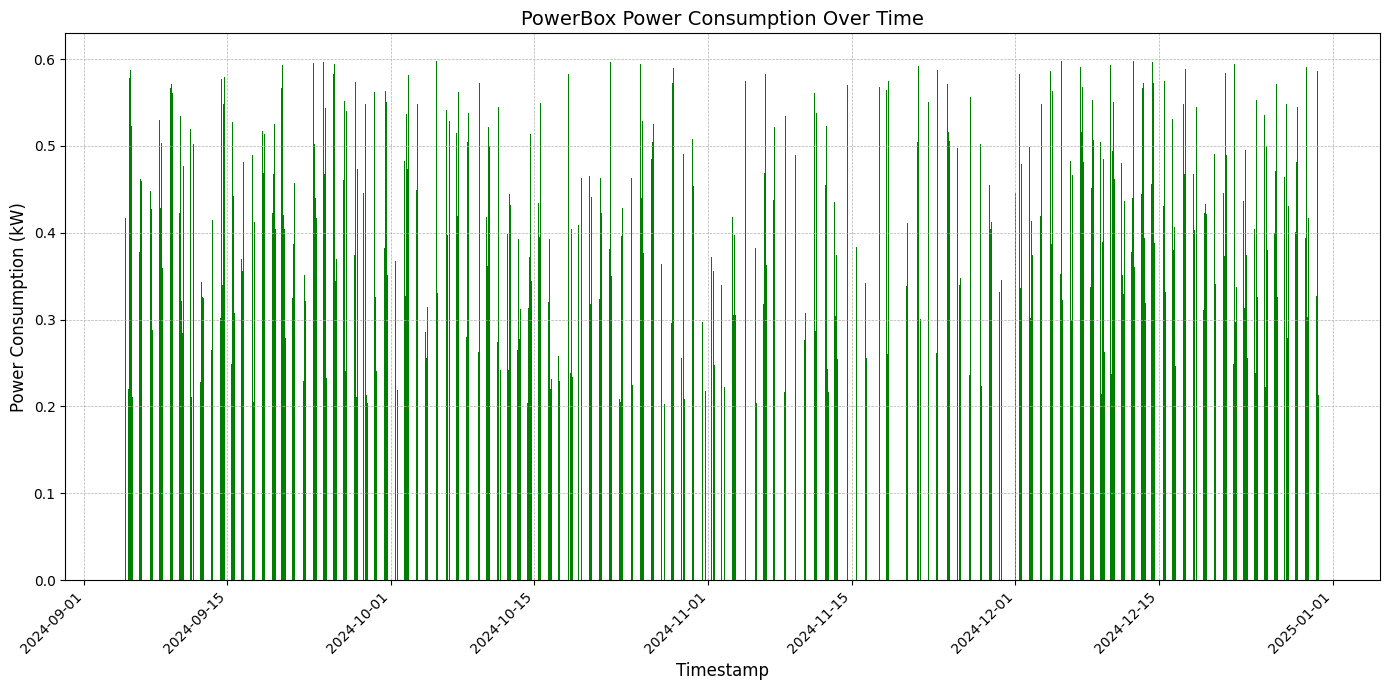

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure timestamps are in datetime format
data["System ON Timestamps"] = pd.to_datetime(data["System ON Timestamps"], format="%d/%m/%Y %H:%M", errors="coerce", dayfirst=True)
data["System OFF Timestamps"] = pd.to_datetime(data["System OFF Timestamps"], format="%d/%m/%Y %H:%M", errors="coerce", dayfirst=True)

# Create a single timestamp column for plotting
data["Timestamp_N/F"] = data["System ON Timestamps"].combine_first(data["System OFF Timestamps"])

# Create a "Status" column (ON if "SystemON Timestamps" has a value, otherwise OFF)
data["Status"] = data["System ON Timestamps"].notna().map({True: "ON", False: "OFF"})

# Sort by Timestamp
data = data.sort_values("Timestamp_N/F")

# Plotting as a bar chart
plt.figure(figsize=(14, 7))

# For ON periods, use green bars; for OFF periods, use red bars
colors = data["Status"].map({"ON": "green", "OFF": "red"})
plt.bar(data["Timestamp_N/F"], data["Power Consumption (kW)"], color=colors, width=0.02)

# Labels and title
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Power Consumption (kW)", fontsize=12)
plt.title("PowerBox Power Consumption Over Time", fontsize=14)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha="right", fontsize=10)

# Display gridlines and make the layout tighter
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


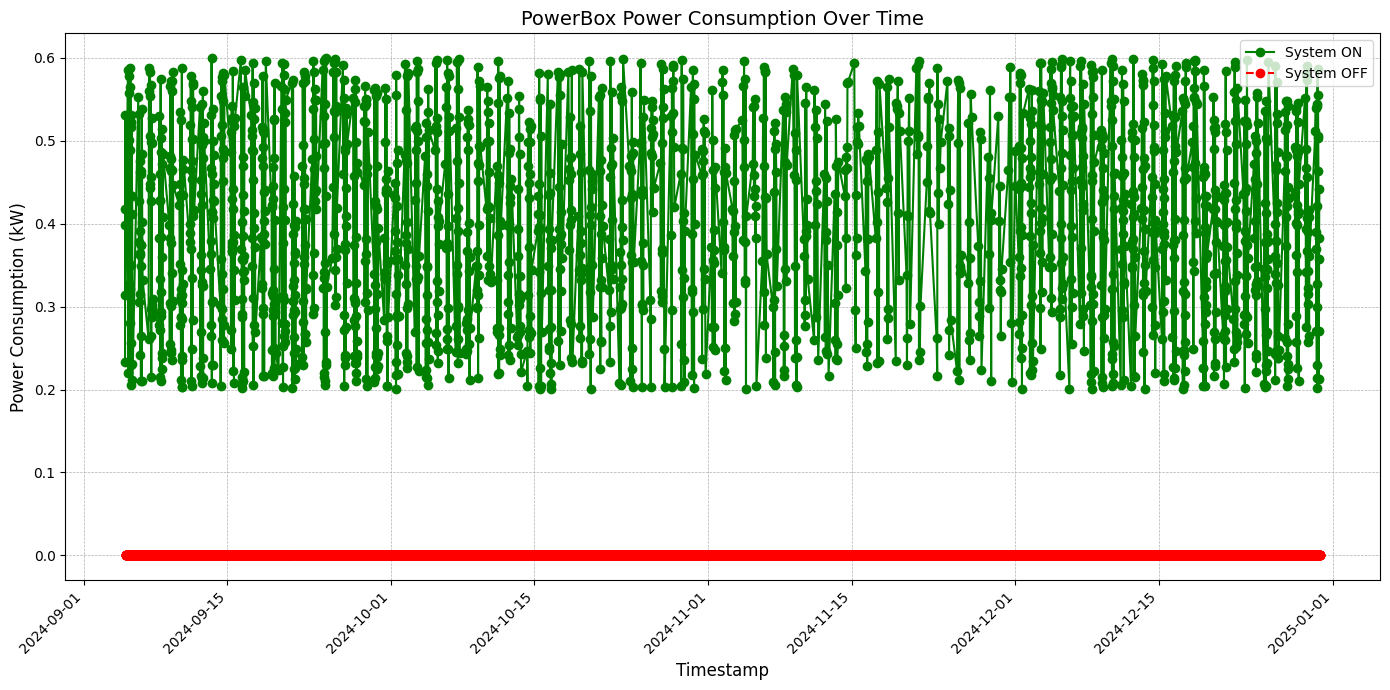

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure timestamps are in datetime format
data["System ON Timestamps"] = pd.to_datetime(data["System ON Timestamps"], format="%d/%m/%Y %H:%M", errors="coerce", dayfirst=True)
data["System OFF Timestamps"] = pd.to_datetime(data["System OFF Timestamps"], format="%d/%m/%Y %H:%M", errors="coerce", dayfirst=True)

# Create a single timestamp column for plotting
data["Timestamp_N/F"] = data["System ON Timestamps"].combine_first(data["System OFF Timestamps"])

# Create a "Status" column (ON if "SystemON Timestamps" has a value, otherwise OFF)
data["Status"] = data["System ON Timestamps"].notna().map({True: "ON", False: "OFF"})

# Sort by Timestamp
data = data.sort_values("Timestamp_N/F")

# Plotting the line chart
plt.figure(figsize=(14, 7))

# Plot power consumption for ON periods (green line)
plt.plot(data["Timestamp_N/F"][data["Status"] == "ON"], 
         data["Power Consumption (kW)"][data["Status"] == "ON"], 
         marker="o", linestyle="-", color="green", label="System ON", markersize=6)

# Plot zero consumption for OFF periods (red line)
plt.plot(data["Timestamp_N/F"][data["Status"] == "OFF"], 
         [0] * len(data[data["Status"] == "OFF"]), 
         marker="o", linestyle="--", color="red", label="System OFF", markersize=6)

# Labels and title
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Power Consumption (kW)", fontsize=12)
plt.title("PowerBox Power Consumption Over Time", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Add grid and legend
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=10)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/mp/87qpdrp52k1drrd3b_m8x_0w0000gn/T/ipykernel_21234/1097511175.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start="2024-01-01", periods=100, freq="H")


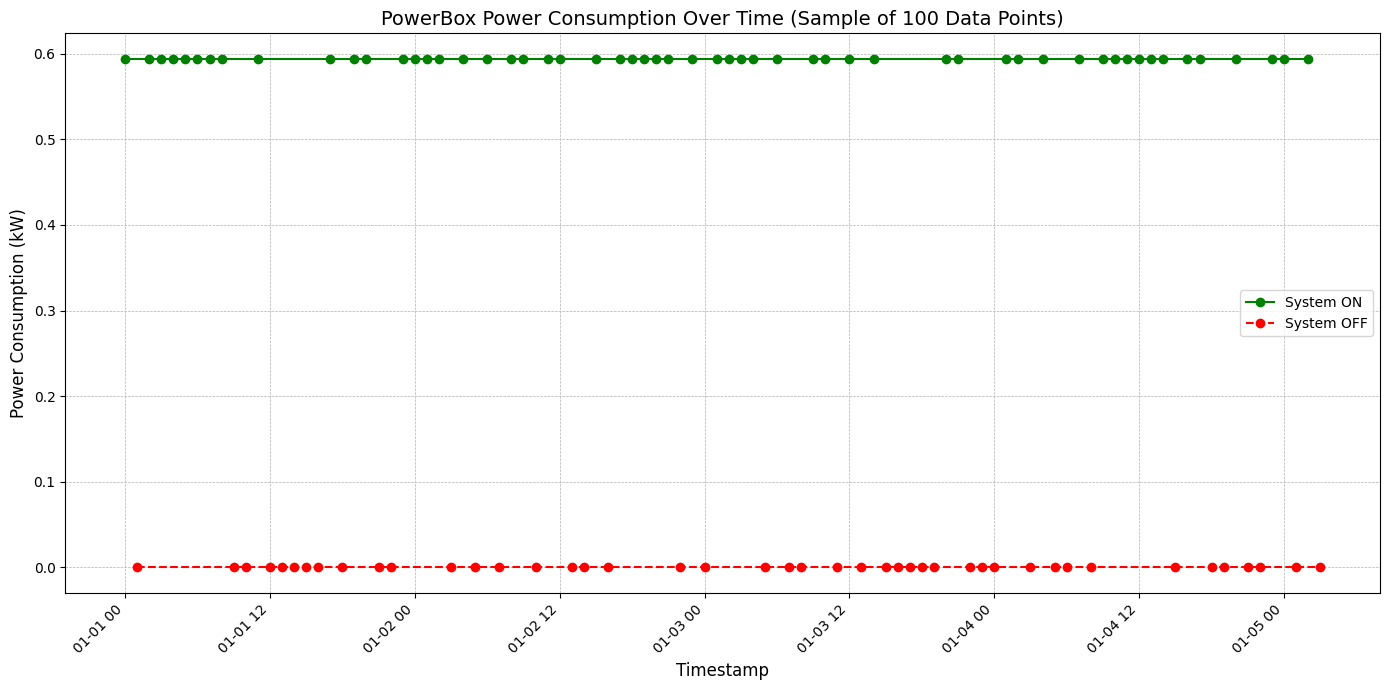

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data (100 data points)
np.random.seed(0)
timestamps = pd.date_range(start="2024-01-01", periods=100, freq="H")
power_consumption = np.random.choice([0, np.random.uniform(0.1, 1.0)], size=100)

# Simulate system ON and OFF times
system_on_timestamps = [ts if power > 0 else pd.NaT for ts, power in zip(timestamps, power_consumption)]
system_off_timestamps = [pd.NaT if power > 0 else ts for ts, power in zip(timestamps, power_consumption)]

# Create DataFrame
data = pd.DataFrame({
    "Timestamp_N/F": timestamps,
    "Power Consumption (kW)": power_consumption,
    "System ON Timestamps": system_on_timestamps,
    "System OFF Timestamps": system_off_timestamps
})

# Create a "Status" column (ON if "SystemON Timestamps" has a value, otherwise OFF)
data["Status"] = data["System ON Timestamps"].notna().map({True: "ON", False: "OFF"})

# Plotting the line chart
plt.figure(figsize=(14, 7))

# Plot power consumption for ON periods (green line)
plt.plot(data["Timestamp_N/F"][data["Status"] == "ON"], 
         data["Power Consumption (kW)"][data["Status"] == "ON"], 
         marker="o", linestyle="-", color="green", label="System ON", markersize=6)

# Plot zero consumption for OFF periods (red line)
plt.plot(data["Timestamp_N/F"][data["Status"] == "OFF"], 
         [0] * len(data[data["Status"] == "OFF"]), 
         marker="o", linestyle="--", color="red", label="System OFF", markersize=6)

# Labels and title
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Power Consumption (kW)", fontsize=12)
plt.title("PowerBox Power Consumption Over Time (Sample of 100 Data Points)", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Add grid and legend
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=10)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


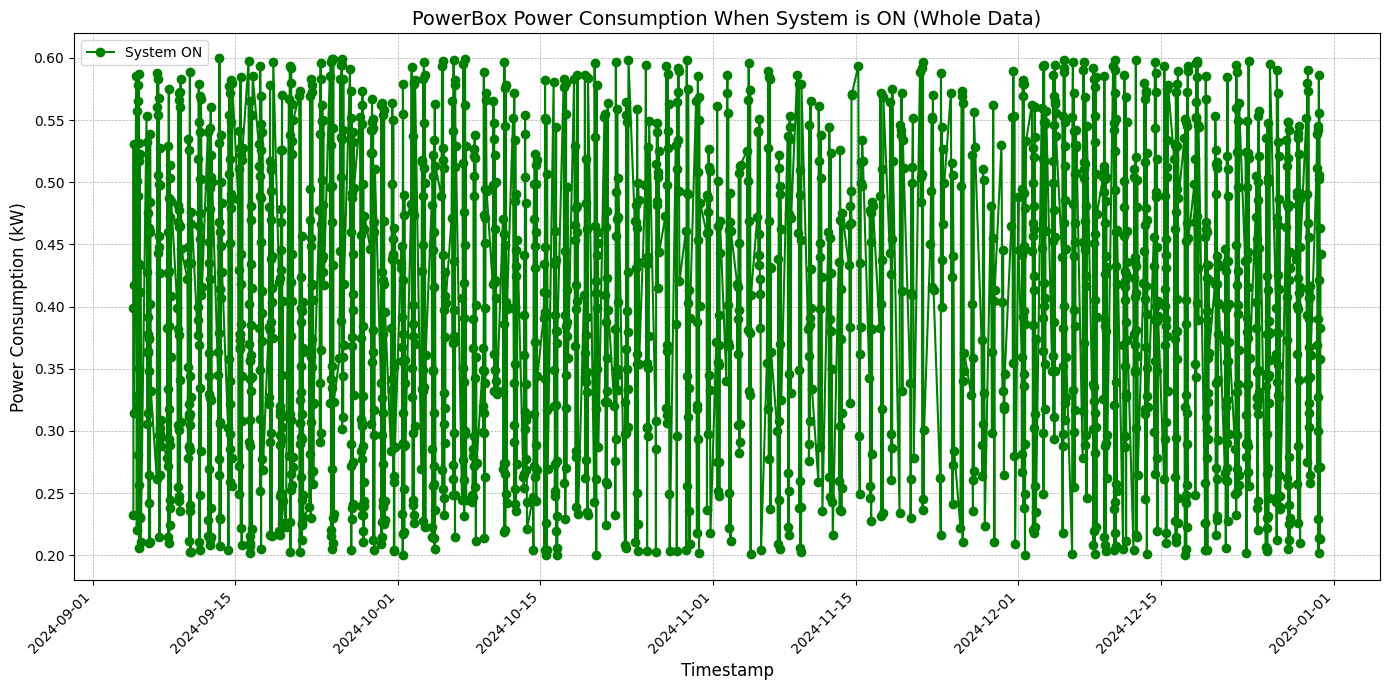

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the 'data' DataFrame with your full data
# Ensure timestamps are in datetime format
data["System ON Timestamps"] = pd.to_datetime(data["System ON Timestamps"], format="%d/%m/%Y %H:%M", errors="coerce", dayfirst=True)
data["System OFF Timestamps"] = pd.to_datetime(data["System OFF Timestamps"], format="%d/%m/%Y %H:%M", errors="coerce", dayfirst=True)

# Create a single timestamp column for plotting
data["Timestamp_N/F"] = data["System ON Timestamps"].combine_first(data["System OFF Timestamps"])

# Create a "Status" column (ON if "SystemON Timestamps" has a value, otherwise OFF)
data["Status"] = data["System ON Timestamps"].notna().map({True: "ON", False: "OFF"})

# Filter data to only include rows where the system is ON (System ON Timestamp is not NaT)
data_on = data[data["System ON Timestamps"].notna()]

# Plotting the line chart
plt.figure(figsize=(14, 7))

# Plot power consumption for ON periods (green line)
plt.plot(data_on["Timestamp_N/F"], 
         data_on["Power Consumption (kW)"], 
         marker="o", linestyle="-", color="green", label="System ON", markersize=6)

# Labels and title
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Power Consumption (kW)", fontsize=12)
plt.title("PowerBox Power Consumption When System is ON (Whole Data)", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Add grid and legend
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=10)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


In [27]:
#create a new subset of data based on when the system is ON

# Filter the data to create a new DataFrame where System ON Timestamps is not NaN
data_on = data[data["System ON Timestamps"].notna()]

In [28]:
data_on.head()

,Timestamp,System ON,System ON Timestamps,System OFF Timestamps,Temperature (°C),Solar Panels Energy Output (W),Power Consumption (kW),Energy Stored in Batteries (kWh),Inverter Efficiency (%),System Load (kW),...,User Coordinates,Solar Panels Type,Solar Panels Configuration,Depth of Discharge,Battery Capacity (Wh),Inverter Capacity (kW),Battery Technology,Solar Irradiance (W/m²),Timestamp_N/F,Status
0,2024-09-05 00:00:00,True,2024-09-05 00:00:00,NaT,21.027232,0.0,0.232676,0.767498,90,0.232676,...,"10.525053,7.417248",MonoCrystalline,1s2p,10%,1000,1,Lithium - Ion,NaN,2024-09-05 00:00:00,ON
1,2024-09-05 00:15:00,True,2024-09-05 00:15:00,NaT,21.000000,0.0,0.398544,0.709329,90,0.398544,...,"10.525053,7.417249",MonoCrystalline,1s2p,10%,1000,1,Lithium - Ion,NaN,2024-09-05 00:15:00,ON
2,2024-09-05 00:30:00,True,2024-09-05 00:30:00,NaT,21.954235,0.0,0.530610,0.609693,90,0.530610,...,"10.525053,7.417250",MonoCrystalline,1s2p,10%,1000,1,Lithium - Ion,NaN,2024-09-05 00:30:00,ON
3,2024-09-05 00:45:00,True,2024-09-05 00:45:00,NaT,22.692779,0.0,0.417322,0.477041,90,0.417322,...,"10.525053,7.417251",MonoCrystalline,1s2p,10%,1000,1,Lithium - Ion,NaN,2024-09-05 00:45:00,ON
4,2024-09-05 01:00:00,True,2024-09-05 01:00:00,NaT,22.200476,0.0,0.314497,0.372710,90,0.314497,...,"10.525053,7.417252",MonoCrystalline,1s2p,10%,1000,1,Lithium - Ion,NaN,2024-09-05 01:00:00,ON


In [30]:
data_on.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,2130,2024-10-31 16:46:24.507042304,2024-09-05 00:00:00,2024-09-27 15:22:30,2024-10-26 12:07:30,2024-12-07 15:37:30,2024-12-30 17:00:00,NaN
System ON Timestamps,2130,2024-10-31 16:46:24.507042304,2024-09-05 00:00:00,2024-09-27 15:22:30,2024-10-26 12:07:30,2024-12-07 15:37:30,2024-12-30 17:00:00,NaN
System OFF Timestamps,0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
Temperature (°C),2130.0,30.983152,21.0,29.838535,31.574389,33.241713,38.554523,3.316995
Solar Panels Energy Output (W),2130.0,198.870906,0.0,138.821188,210.979613,269.061823,300.0,77.288128
Power Consumption (kW),2130.0,0.40034,0.200038,0.299283,0.401363,0.500964,0.599723,0.1167
Energy Stored in Batteries (kWh),2130.0,0.284746,0.2,0.248647,0.284873,0.319188,0.767498,0.049393
Inverter Efficiency (%),2130.0,90.0,90.0,90.0,90.0,90.0,90.0,0.0
System Load (kW),355.0,0.394872,0.202152,0.297831,0.394868,0.495472,0.599723,0.116026
Voltage (V),2130.0,220.0,220.0,220.0,220.0,220.0,220.0,0.0


In [32]:
data_on.columns

Index(['Timestamp', 'System ON', 'System ON Timestamps',
       'System OFF Timestamps', 'Temperature (°C)',
       'Solar Panels Energy Output (W)', 'Power Consumption (kW)',
       'Energy Stored in Batteries (kWh)', 'Inverter Efficiency (%)',
       'System Load (kW)', 'System Fault Alerts', 'Voltage (V)', 'Current (A)',
       'Power Factor', 'Dust and Dirt Accumulation (g/m²)', 'Battery Low Flag',
       'Battery Full Flag', 'Customer Profile', 'User Coordinates',
       'Solar Panels Type', 'Solar Panels Configuration', 'Depth of Discharge',
       'Battery Capacity (Wh)', 'Inverter Capacity (kW)', 'Battery Technology',
       'Solar Irradiance (W/m²)', 'Timestamp_N/F', 'Status'],
      dtype='object')

In [31]:
data_on.describe(include='object')

,Customer Profile,User Coordinates,Solar Panels Type,Solar Panels Configuration,Depth of Discharge,Battery Technology,Status
count,1780,2130,2130,2130,2130,2130,2130
unique,2,1255,1,1,1,1,1
top,Residential,"12.0022, 8.5920",MonoCrystalline,1s2p,10%,Lithium - Ion,ON
freq,1450,680,2130,2130,2130,2130,2130


In [33]:
# Identify constant columns (where all values are the same)
constant_columns = [col for col in data_on.columns if data[col].nunique() == 1]

# Print out the constant columns removed
print(f"Constant columns removed: {constant_columns}")


Constant columns removed: ['Inverter Efficiency (%)', 'System Fault Alerts', 'Voltage (V)', 'Power Factor', 'Battery Full Flag', 'Solar Panels Type', 'Solar Panels Configuration', 'Depth of Discharge', 'Battery Capacity (Wh)', 'Inverter Capacity (kW)', 'Battery Technology']


In [34]:
#drop constant columns 
data_cleaned = data_on.drop(columns=constant_columns)

#remove timestamp data too
data_cleaned=data_cleaned.drop(columns=['Timestamp', 'System ON', 'System ON Timestamps',
       'System OFF Timestamps','Timestamp_N/F', 'Status'])

In [35]:
data_cleaned.head()

,Temperature (°C),Solar Panels Energy Output (W),Power Consumption (kW),Energy Stored in Batteries (kWh),System Load (kW),Current (A),Dust and Dirt Accumulation (g/m²),Battery Low Flag,Customer Profile,User Coordinates,Solar Irradiance (W/m²)
0,21.027232,0.0,0.232676,0.767498,0.232676,1.057620,0.001,False,Residential,"10.525053,7.417248",NaN
1,21.000000,0.0,0.398544,0.709329,0.398544,1.811565,0.002,False,Residential,"10.525053,7.417249",NaN
2,21.954235,0.0,0.530610,0.609693,0.530610,2.411864,0.003,False,Residential,"10.525053,7.417250",NaN
3,22.692779,0.0,0.417322,0.477041,0.417322,1.896917,0.004,False,Residential,"10.525053,7.417251",NaN
4,22.200476,0.0,0.314497,0.372710,0.314497,1.429532,0.005,True,Residential,"10.525053,7.417252",NaN


In [39]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2130 entries, 0 to 11170
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Temperature (°C)                   2130 non-null   float64
 1   Solar Panels Energy Output (W)     2130 non-null   float64
 2   Power Consumption (kW)             2130 non-null   float64
 3   Energy Stored in Batteries (kWh)   2130 non-null   float64
 4   System Load (kW)                   355 non-null    float64
 5   Current (A)                        2130 non-null   float64
 6   Dust and Dirt Accumulation (g/m²)  2130 non-null   float64
 7   Battery Low Flag                   2130 non-null   bool   
 8   Customer Profile                   1780 non-null   object 
 9   User Coordinates                   2130 non-null   object 
 10  Solar Irradiance (W/m²)            1775 non-null   float64
 11  latitude                           2130 non-null   float64
 

In [38]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Assuming data_cleaned is your DataFrame
# Sample of how 'user coordinates' might look
# data_cleaned = pd.DataFrame({'user_coordinates': ['10.525053,7.417248', '34.0522,-118.2437', '51.5074,-0.1278', ...]})

# Step 1: Split 'user coordinates' into 'latitude' and 'longitude'
data_cleaned[['latitude', 'longitude']] = data_cleaned['User Coordinates'].str.split(',', expand=True)

# Convert latitude and longitude to numeric type
data_cleaned['latitude'] = pd.to_numeric(data_cleaned['latitude'], errors='coerce')
data_cleaned['longitude'] = pd.to_numeric(data_cleaned['longitude'], errors='coerce')

# Step 2: Create a map centered around the average location of users
map_center = [data_cleaned['latitude'].mean(), data_cleaned['longitude'].mean()]  # Center on the average location
user_map = folium.Map(location=map_center, zoom_start=3)  # Adjust zoom_start for better visibility

# Step 3: Create a MarkerCluster to group nearby points
marker_cluster = MarkerCluster().add_to(user_map)

# Add each user's coordinate as a marker
for _, row in data_cleaned.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Latitude: {row['latitude']}, Longitude: {row['longitude']}",
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Step 4: Save and display the map (it will be an interactive map)
user_map.save('user_locations_clustered_map.html')

In [40]:
#I will be dropping coordinate at this stage.
data_cleaned=data_cleaned.drop(columns=['User Coordinates','latitude','longitude'])

In [41]:
data_cleaned.isna().sum()

Temperature (°C)                        0
Solar Panels Energy Output (W)          0
Power Consumption (kW)                  0
Energy Stored in Batteries (kWh)        0
System Load (kW)                     1775
Current (A)                             0
Dust and Dirt Accumulation (g/m²)       0
Battery Low Flag                        0
Customer Profile                      350
Solar Irradiance (W/m²)               355
dtype: int64

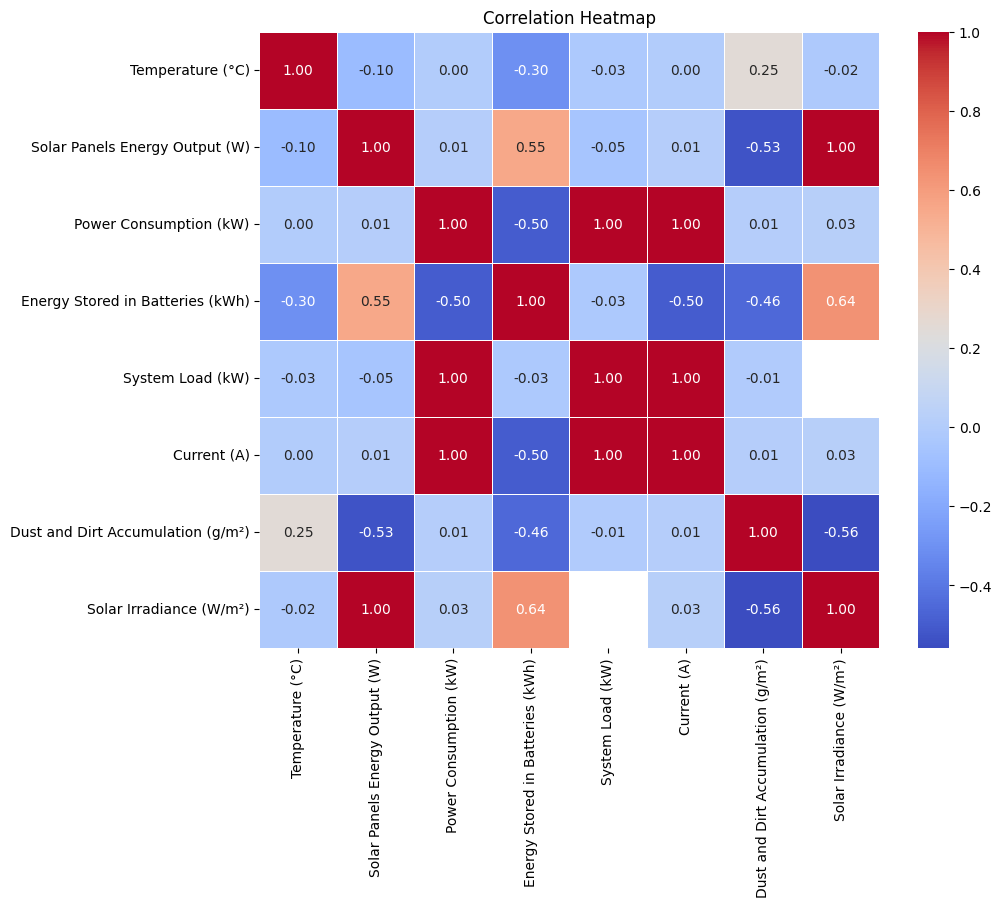

,Temperature (°C),Solar Panels Energy Output (W),Power Consumption (kW),Energy Stored in Batteries (kWh),System Load (kW),Current (A),Dust and Dirt Accumulation (g/m²),Solar Irradiance (W/m²)
Temperature (°C),1.000000,-0.101481,0.000376,-0.304126,-0.026408,0.000376,0.245747,-0.021769
Solar Panels Energy Output (W),-0.101481,1.000000,0.010003,0.554475,-0.047999,0.010003,-0.529874,0.999947
Power Consumption (kW),0.000376,0.010003,1.000000,-0.497624,1.000000,1.000000,0.013996,0.025887
Energy Stored in Batteries (kWh),-0.304126,0.554475,-0.497624,1.000000,-0.027897,-0.497624,-0.456750,0.640910
System Load (kW),-0.026408,-0.047999,1.000000,-0.027897,1.000000,1.000000,-0.005064,NaN
Current (A),0.000376,0.010003,1.000000,-0.497624,1.000000,1.000000,0.013996,0.025887
Dust and Dirt Accumulation (g/m²),0.245747,-0.529874,0.013996,-0.456750,-0.005064,0.013996,1.000000,-0.557582
Solar Irradiance (W/m²),-0.021769,0.999947,0.025887,0.640910,NaN,0.025887,-0.557582,1.000000


In [53]:
def correlation_analysis(df):
    # Select only numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate correlation matrix for numeric columns
    correlation_matrix = numeric_df.corr()

    # Optionally, visualize the correlation matrix using heatmap
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Create a heatmap to visualize the correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

    return correlation_matrix

correlation_analysis(data_cleaned)

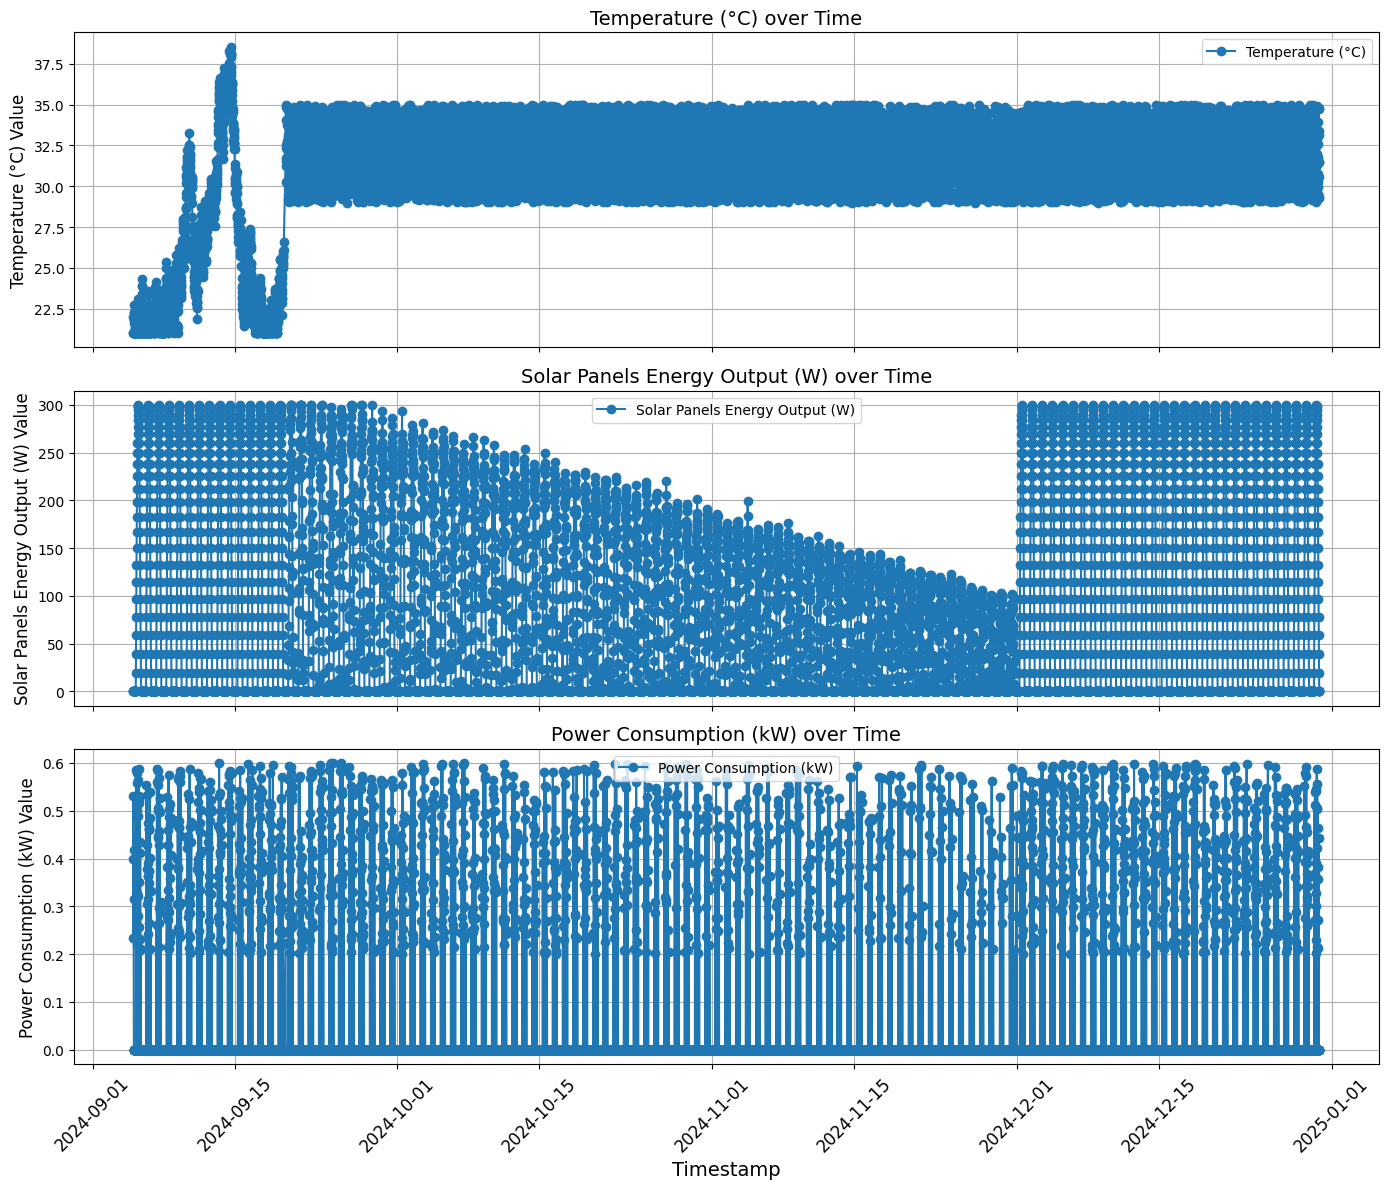

In [54]:
# Select relevant numeric columns that make sense for visualization
selected_columns = ['Temperature (°C)', 'Solar Panels Energy Output (W)', 
                    'Power Consumption (kW)']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(14, 12), sharex=True)

# Plot each selected column in a separate subplot
for i, col in enumerate(selected_columns):
    axes[i].plot(data['Timestamp'], data[col], marker='o', label=col, color='tab:blue')
    axes[i].set_title(f'{col} over Time', fontsize=14)
    axes[i].set_ylabel(f'{col} Value', fontsize=12)
    axes[i].grid(True)
    axes[i].legend(loc='best')

# Customize the x-axis for all subplots
plt.xlabel('Timestamp', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [55]:
data_cleaned.head()

,Temperature (°C),Solar Panels Energy Output (W),Power Consumption (kW),Energy Stored in Batteries (kWh),System Load (kW),Current (A),Dust and Dirt Accumulation (g/m²),Battery Low Flag,Customer Profile,Solar Irradiance (W/m²)
0,21.027232,0.0,0.232676,0.767498,0.232676,1.057620,0.001,False,Residential,NaN
1,21.000000,0.0,0.398544,0.709329,0.398544,1.811565,0.002,False,Residential,NaN
2,21.954235,0.0,0.530610,0.609693,0.530610,2.411864,0.003,False,Residential,NaN
3,22.692779,0.0,0.417322,0.477041,0.417322,1.896917,0.004,False,Residential,NaN
4,22.200476,0.0,0.314497,0.372710,0.314497,1.429532,0.005,True,Residential,NaN


In [66]:
data_cleaned.to_csv("clean_data_v2.csv")

In [65]:
import os

# Define the directory and file path
directory = 'ETL/processed_data/'
file_path = os.path.join(directory, 'data_cleaned.csv')

# Step 1: Check if the directory exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)

# Step 2: Save the DataFrame to CSV
data_cleaned.to_csv(file_path)